---

# Estudos Avançados de Bancos de Dados
### **Pontifícia Universidade Católica de Campinas**
### **Prof. Dr. Denis Mayr Lima Martins**

---

## Clustering

Vamos explorar técnicas de agrupamento (clustering), uma categoria de técnicas de aprendizado não supervisionado que nos permite descobrir estruturas ocultas em dados, mesmo sem conhecer a resposta correta previamente. Isso significa que não precisamos de dados rotulados (labeled data) ou que sejam caros para serem coletados e obtidos – por exemplo, obter opiniões de especialistas é difícil e dispendoso.  Nesses casos, não temos dados "ground truth" para guiar (ou supervisionar) o aprendizado dos modelos.

O objetivo do **agrupamento** é encontrar um agrupamento natural nos dados, de forma que itens no mesmo grupo sejam mais semelhantes entre si do que aos itens de grupos diferentes.

Considere o cenário ilustrativo abaixo:

Problema: Uma loja online que vende produtos artesanais deseja entender melhor seus clientes para personalizar ofertas e melhorar a experiência de compra. A loja coletou dados sobre dois aspectos importantes dos clientes: "Tempo no Site" (em minutos) e "Valor Médio do Pedido" (em reais). Com base nesses dados, a loja quer segmentar os clientes em grupos distintos para direcionar campanhas de marketing mais eficazes.

Dados: Para simplificar o exemplo, vamos criar um conjunto de dados sintético com 100 clientes, usando duas variáveis: "Tempo no Site" e "Valor Médio do Pedido". Os dados serão gerados aleatoriamente para simular diferentes perfis de clientes.


In [1]:
import pandas as pd
from sklearn.datasets import make_blobs

# Gerando dados aleatórios
X, y = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std=0.3, 
random_state=0, center_box=(1, 10))

tempo_real = X[:, 0] * 5
valor_real = X[:, 1] * 20

# Criando um DataFrame para facilitar a visualização 
dados = pd.DataFrame({'Tempo no Site': tempo_real, 'Valor Médio do Pedido': valor_real})
dados

,Tempo no Site,Valor Médio do Pedido
0,33.773841,122.010555
1,28.364929,136.849307
2,29.174739,149.672180
3,28.353408,151.055501
4,33.814306,111.599384
...,...,...
145,21.928375,133.301021
146,23.026391,145.479203
147,22.976070,127.960757
148,32.718362,111.520604


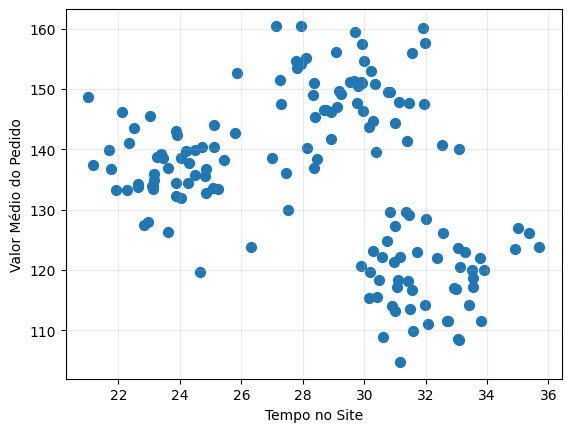

In [2]:
import matplotlib.pyplot as plt

plt.scatter(tempo_real, valor_real, s=50)
plt.xlabel("Tempo no Site")
plt.ylabel("Valor Médio do Pedido")
plt.grid(alpha=0.25);

Com um pouco de atenção, é possível ver três grupos no nosso dataset.


Antes de entrarmos em mais detalhes, vamos dar uma olhada rápida no que o *k-means* com 3 grupos fará para segmentar esses clientes em 3 grupos:

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init="auto", random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Agora vamos plotar os dados novamente e codificar cada ponto com a atribuição de cluster fornecida pelo *k-means*. Também plotamos o centro de cada grupo em vermelho, para que possamos verificar onde o algoritmo previu que os grupos estavam localizados.

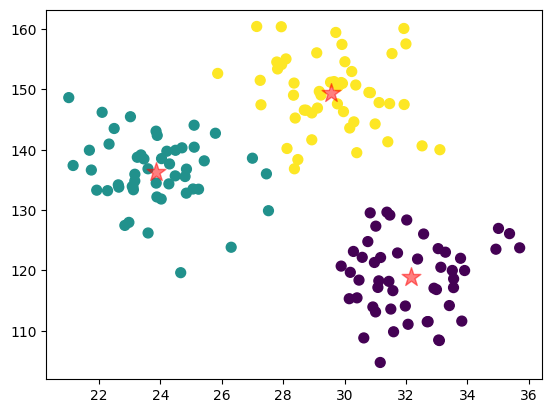

In [4]:
plt.scatter(tempo_real, valor_real, c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0]*5, centers[:, 1]*20, c='red', s=200, alpha=0.5, marker='*');

Podemos interpretar os grupos encontrados como:
* **Compradores Eficientes:** Baixo tempo no site e valor médio do pedido moderado. Esses clientes são valiosos para a loja e devem receber ofertas personalizadas e programas de fidelidade.
* **Compradores Interessados:** Alto tempo no site e alto valor médio do pedido. Esses clientes podem ser atraídos a retornar ao site com conteúdo relevante e promoções direcionadas.
* **Navegadores:** Tempo médio no site e baixo valor médio do pedido. Esses clientes podem precisar de incentivos adicionais para aumentar seus gastos, como descontos ou frete grátis.

## Outros Exemplos de Cénarios de Clustering

*   **Segmentação de Clientes:** No marketing, o agrupamento pode ser usado para segmentar clientes com base em suas características demográficas, hábitos de compra e outras características.
*   **Segmentação de Imagens:** Na visão computacional, o agrupamento pode ser usado para segmentar uma imagem em diferentes regiões com base em cor, textura ou outras características.
*   **Agrupamento de Documentos:** Na recuperação de informação, o agrupamento pode ser usado para agrupar documentos semelhantes, facilitando a busca e recuperação de informações relevantes.
*   **Detecção de Anomalias:** Na segurança de redes, o agrupamento pode ser usado para identificar padrões incomuns no tráfego de rede, que podem indicar um ataque ou uma falha do sistema.


![Diferentes tipos de problema de aprendizado de máquina](https://www.researchgate.net/publication/351953193/figure/download/fig3/AS:1028671531925505@1622265813636/Supervised-and-unsupervised-machine-learning-a-Schematic-representation-of-an.png)


## 2. Agrupamento com k-Means

O algoritmo *k-means* busca encontrar um número predeterminado de grupos (clusters) dentro de um conjunto de dados multidimensionais não rotulados.

Ele faz isso usando uma concepção simples do que a agrupamento ideal deve ser:

*   O "centroide" do grupo é a média aritmética de todos os pontos pertencentes ao grupo.
*   Cada ponto está mais próximo do seu próprio centroide do que dos outros centroides.

Essas duas premissas são a base do modelo *k-means*.

Em breve, mergulharemos em exatamente como o algoritmo alcança essa solução, mas por enquanto, vamos dar uma olhada em um conjunto de dados simples e ver o resultado do *k-means*.

Dado um conjunto de dados multidimensional, o *k-means* atribui aleatoriamente k pontos (os centroides) no espaço dos dados que devem representar os centros dos grupos. Ele atribui cada instância de dado ao centroide mais próximo. Após a atribuição, os centroides são movidos para a média de todos os pontos atribuídos a eles, e as atribuições são realizadas novamente. O processo termina quando as atribuições se tornam estáveis, ou seja, nenhum item muda de grupo.

![kmeans algorithm](https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png)

Um exemplo da aplicação do algoritmo *k-means* a um pequeno conjunto de dados é apresentado no vídeo abaixo:

<iframe
    width="600"
    height="400"
    src="https://www.youtube.com/embed/5I3Ei69I40s"
    frameborder="0"
    allowfullscreen

></iframe>

## Funcionamento do k-means

Se não tivermos informações sobre a categoria (ground truth) dos exemplos em um determinado conjunto de dados, nosso objetivo é agrupar os exemplos com base nas similaridades de seus recursos, conforme resumido nos seguintes quatro passos:

1.  Escolha aleatoriamente *k* centroides dos exemplos como centros iniciais dos grupos.
2.  Atribua cada exemplo ao centroide mais próximo.
3.  Mova os centroides para o centro de todos os exemplos atribuídos a eles.
4.  Repita os passos 2 e 3 até que as atribuições se tornem estáveis (ou seja, nenhum item mude de grupo) ou um número máximo de iterações seja atingido.

Uma forma de definir a similaridade é o oposto da distância, e uma distância comumente usada para agrupar exemplos com recursos contínuos é a **distância euclidiana ao quadrado** entre dois pontos *x* e *y* em um espaço *m*-dimensional:

$$d(x,y)^2 = \sum_{j=1}^m (x_j - y_j)^2$$

Observe que o índice *j* se refere à *j*-ésima dimensão (coluna de recursos) dos inputs *x* e *y*.  Em seguida, usaremos superscritos *i* e *j* para referir-nos ao índice do exemplo (registro de dados) e ao índice do cluster, respectivamente.

Com base nesta métrica de distância euclidiana, o algoritmo *k-means* pode ser descrito como um problema de otimização simples, uma abordagem iterativa para minimizar a **soma dos quadrados dos erros dentro do grupo** ("inércia do cluster"):

$$SSE = \sum_{i=1}^m \sum_{j=1}^k w^{(i,j)} d(x^{(i)}\, \mu^{(j)})^2,$$

onde $\mu^{(j)}$ é o centroide para o grupo *j*; $w^{(i,j)} = 1$ se $x^{(i)} \in $ grupo *j* e 0 caso contrário.

Agora vamos aplicar isso a um conjunto de dados de amostra usando novamente a classe `KMeans` do módulo `cluster` da scikit-learn:

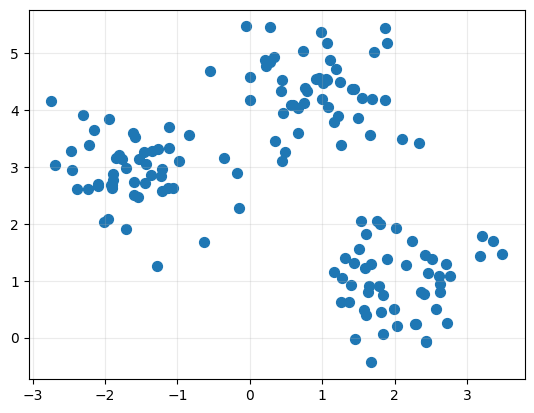

In [5]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std=0.60, 
random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.grid(alpha=0.25);

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)


Utilizando o código anterior, definimos o número de grupos desejados para 3. Definimos `n_init=10` para executar os algoritmos de agrupamento *k-means* 10 vezes independentemente, com centroides aleatórios diferentes para escolher o modelo final como aquele com a menor SSE. Através do parâmetro `max_iter`, especificamos o número máximo de iterações para cada execução individual (300 aqui). Note que a implementação do *k-means* no scikit-learn interrompe precocemente se convergir antes que o número máximo de iterações seja atingido. No entanto, é possível que o *k-means* não atinja a convergência para uma determinada execução, o que pode ser computacionalmente caro se escolhemos valores relativamente altos para `max_iter`. Uma forma de lidar com problemas de convergência é escolher valores maiores para `tol`, que é um parâmetro que controla a **tolerância** em relação às mudanças na SSE dentro do grupo para declarar a convergência. No código anterior, escolhemos uma tolerância de `1e-04` (=0.0001).


**Observações:**

*   **`init='random'`**:  Especifica que os centroides iniciais serão escolhidos aleatoriamente.
*   **`n_init=10`**:  Executa o algoritmo *k-means* 10 vezes com inicializações diferentes e seleciona a melhor solução (baseada na SSE). Isso ajuda a evitar ficar preso em mínimos locais.
*   **`max_iter=300`**: Define o número máximo de iterações que o algoritmo fará antes de parar.
*   **`tol=1e-04`**:  Define a tolerância para a mudança nos centroides. O algoritmo para quando a mudança for menor que essa tolerância.
*   **`random_state=0`**: Define uma semente aleatória para garantir resultados reproduzíveis.

Tendo previsto as etiquetas de cluster `y_km` e discutido alguns dos desafios do algoritmo *k-means*, vamos agora visualizar os grupos que o *k-means* identificou no conjunto de dados junto com os centros dos grupos. Estes são armazenados no atributo `cluster_centers_` do objeto `KMeans` ajustado:

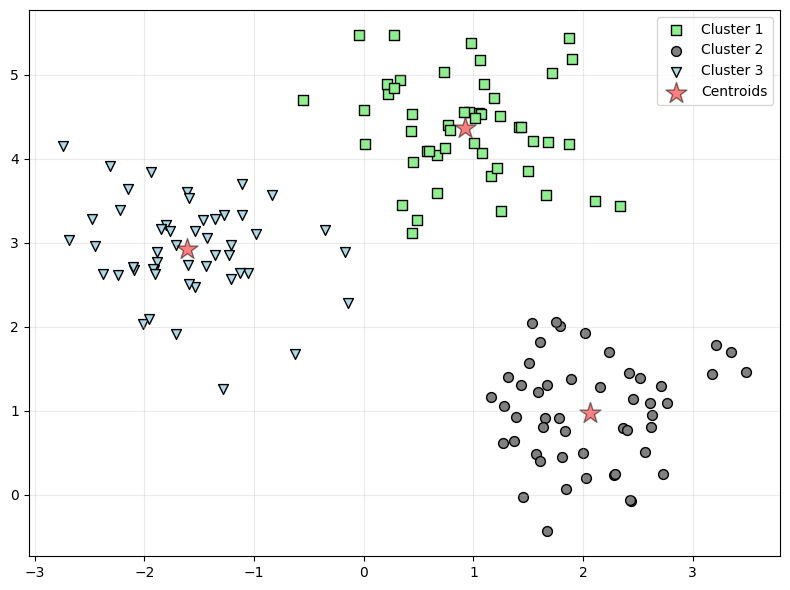

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='grey',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids', alpha=0.5)

plt.legend(scatterpoints=1)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

Podemos visualizar as coordenadas de cada centroide utilizando um DataFrame Pandas:

In [8]:
import pandas as pd
df = pd.DataFrame(X)
df['cluster'] = y_km
df.head()

,0,1,cluster
0,2.715063,1.290822,1
1,0.443599,3.115309,0
2,0.767523,4.397597,0
3,0.438990,4.535929,0
4,2.731249,0.249705,1


O número de grupos a escolher nem sempre é óbvio, especialmente se estivermos trabalhando com um conjunto de dados de maior dimensão que não pode ser visualizado. Outras propriedades do *k-means* são que os grupos não se sobrepõem e não são hierárquicos, e também assumimos que há pelo menos um item em cada grupo. Diferentes tipos de algoritmos de agrupamento, como o hierárquico e o baseado em densidade, não exigem especificar o número de grupos antecipadamente nem assumem estruturas esféricas no nosso conjunto de dados.

## Utilizando o método do cotovelo (elbow method) para encontrar o número ótimo de clusters

Como não temos as etiquetas de classe "ground truth" no nosso conjunto de dados, para quantificar a qualidade do agrupamento precisamos usar métricas intrínsecas — como a SSE dentro do grupo (distorção) — para comparar o desempenho de diferentes agrupamentos *k-means*.

Convenientemente, não precisamos calcular explicitamente a SSE dentro do grupo quando estamos usando scikit-learn, pois ela já está acessível através do atributo `inertia_` após ajustar um modelo `KMeans`:

```python
print('Distortion: %.2f' % km.inertia_)
```

Com base na SSE dentro do grupo, podemos usar uma ferramenta gráfica, o chamado **método do cotovelo**, para estimar o número ótimo de *k* de clusters para uma determinada tarefa. Podemos dizer que se *k* aumenta, a distorção diminui. Isso ocorre porque os exemplos estarão mais próximos dos centroides aos quais são atribuídos. A ideia por trás do método do cotovelo é identificar o valor de *k* onde a distorção começa a aumentar mais rapidamente, o que ficará mais claro se plotarmos a distorção para diferentes valores de *k*:

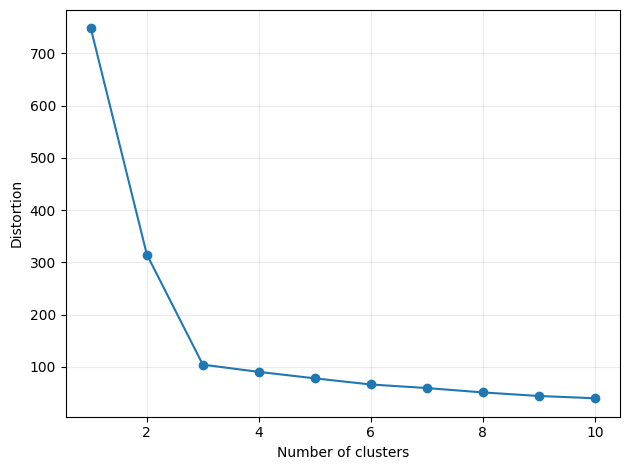

In [9]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


Como podemos ver neste gráfico, o cotovelo está localizado em *k* = 3, portanto, isso é evidência de que *k* = 3 é realmente uma boa escolha para este conjunto de dados.

## K-Means aplicado ao Digits dataset

Vamos utilizar o conjunto de dados composto por bitmaps de imagens de dígitos manuscritos. O conjunto de dados contém 10 classes, onde cada classe se refere a um dígito de 0 a 9. Cada dígito é uma matriz 8x8, onde cada elemento é um inteiro no intervalo [0, 16].

### Carregando os dados

Utilizamos a função **load_digits** para baixar o conjunto de dados do scikit-learn:

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()

Podemos verificar as características fornecidas no conjunto de dados acessando o atributo `.data`, onde cada linha tem 8x8 = 64 entradas:


In [11]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Estamos considerando imagens de tamanho 8x8, ou seja, cada imagem tem 64 valores de pixels entre 0 (branco) e 16 (preto). Esses 64 valores são percebidos como um vetor com 64 dimensões para que possam ser processados da mesma forma que fizemos acima.

Os rótulos (labels) são armazenadas no atributo `.target`, embora não as utilizemos para ajustar nosso modelo:

In [12]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Aplicando o algoritmo K-Means

Agora podemos aplicar o K-Means ao conjunto de dados. Já sabemos que existem 10 clusters, cada um se referindo a um dígito. Portanto, nosso parâmetro *k* é definido para 10, ou seja, **n_clusters=10**:

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init="auto", random_state=0)
kmeans.fit(digits.data)

KMeans(n_clusters=10, n_init='auto', random_state=0)

### Fazendo previsões

Para atribuir um cluster a cada instância de dados no conjunto de dados, utilizamos a função **predict()**. O modelo resultante prevê a qual dos 10 clusters uma instância pertence:

In [14]:
clusters = kmeans.predict(digits.data)


O modelo agora pode fazer previsões para as cinco primeiras imagens do conjunto de dados:

In [15]:
print(clusters[:5])

[1 2 2 9 4]


### Plotando os centros dos clusters

Começamos usando o atributo `.cluster_centers_` do K-Means que armazena informações sobre as coordenadas dos centros dos clusters no espaço multi-dimensional. Em seguida, aplicamos **reshape(10, 8, 8)** para remodelar essas coordenadas em imagens de 8x8, dado que temos 10 dígitos diferentes. Aqui, 10 é o número de clusters, 8x8 é o tamanho das imagens.

In [16]:
centers = kmeans.cluster_centers_.reshape(10, 8, 8)


Finalmente, plotamos os centros dos clusters como figuras em formato tabular com 2 linhas e 5 colunas. Cada célula da tabela corresponde a uma imagem de dígito. Para fins de legibilidade, redimensionamos as imagens (8x4) para se ajustar ao espaço de apresentação no notebook:

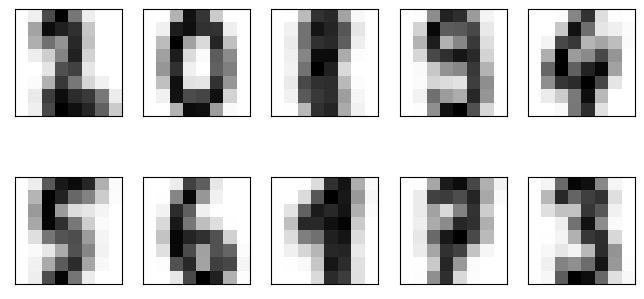

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(8, 4))
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()


Os centros são computados usando a representação vetorial das imagens como explicado acima. Alguns parecem como se várias imagens fossem sobrepostas umas sobre as outras.

## K-Means para Compressão de Cores

Uma aplicação interessante do clustering é na compressão de cores dentro de imagens. Imagine que você tenha uma imagem com milhões de cores possíveis. Em muitas imagens, uma grande quantidade dessas cores não são utilizadas e muitos pixels da imagem possuem cores similares ou até idênticas.

Por exemplo, considere a imagem mostrada na figura seguinte, proveniente do módulo “datasets” do Scikit-Learn (para isso, você precisará ter o pacote Python “pillow” instalado).

In [18]:
!pip install pillow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


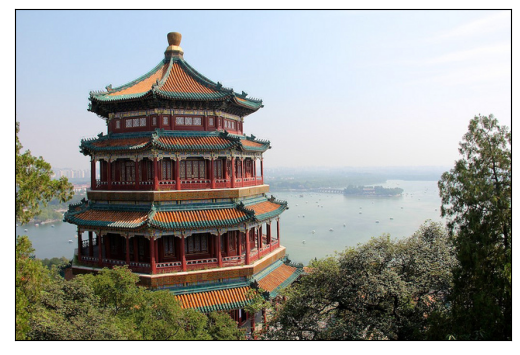

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);


A imagem em si é armazenada em um array tridimensional de tamanho `(altura, largura, RGB)`, contendo as contribuições em vermelho/azul/verde como inteiros de 0 a 255:

In [20]:
china.shape

(427, 640, 3)

Podemos visualizar este conjunto de pixels como um nuvem de pontos em um espaço tridimensional de cores.  Vamos remodelar os dados para `[n_samples x n_features]` e redimensionar as cores para que elas estejam entre 0 e 1:


In [21]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Podemos visualizar esses pixels neste espaço de cores, usando um subconjunto de 10.000 pixels para eficiência:

In [22]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);



A função `plot_pixels` é definida para realizar essa visualização. Ela recebe os dados, um título e uma lista de cores (opcional) e um número de amostras a serem plotadas (`N`).  Ela seleciona aleatoriamente um subconjunto dos pixels e os plota em dois gráficos: um com as componentes vermelha, verde e azul separadamente, e outro com as três componentes combinadas.


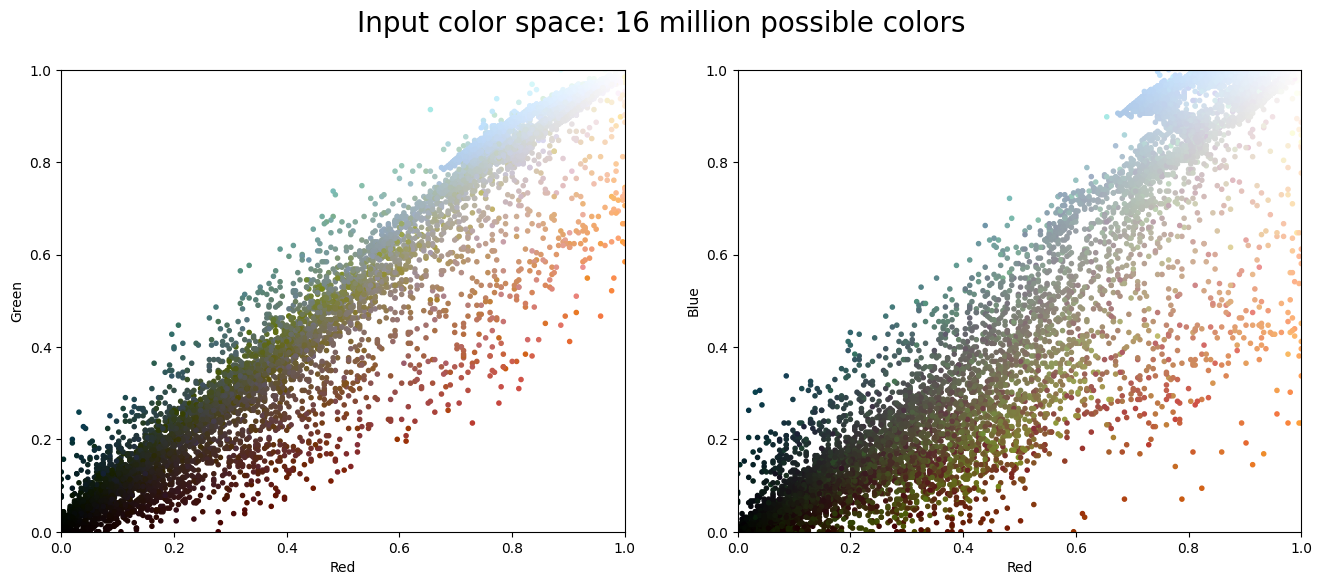

In [23]:
plot_pixels(data, title='Input color space: 16 million possible colors')


Agora, vamos reduzir estas 16 milhões de cores para apenas 16 cores, utilizando um clustering *k*-means sobre o espaço de pixels.  Como estamos lidando com um conjunto de dados muito grande, utilizaremos o MiniBatch *k*-means, que opera em subconjuntos dos dados para calcular o resultado de forma muito mais rápida do que o algoritmo *k*-means padrão:


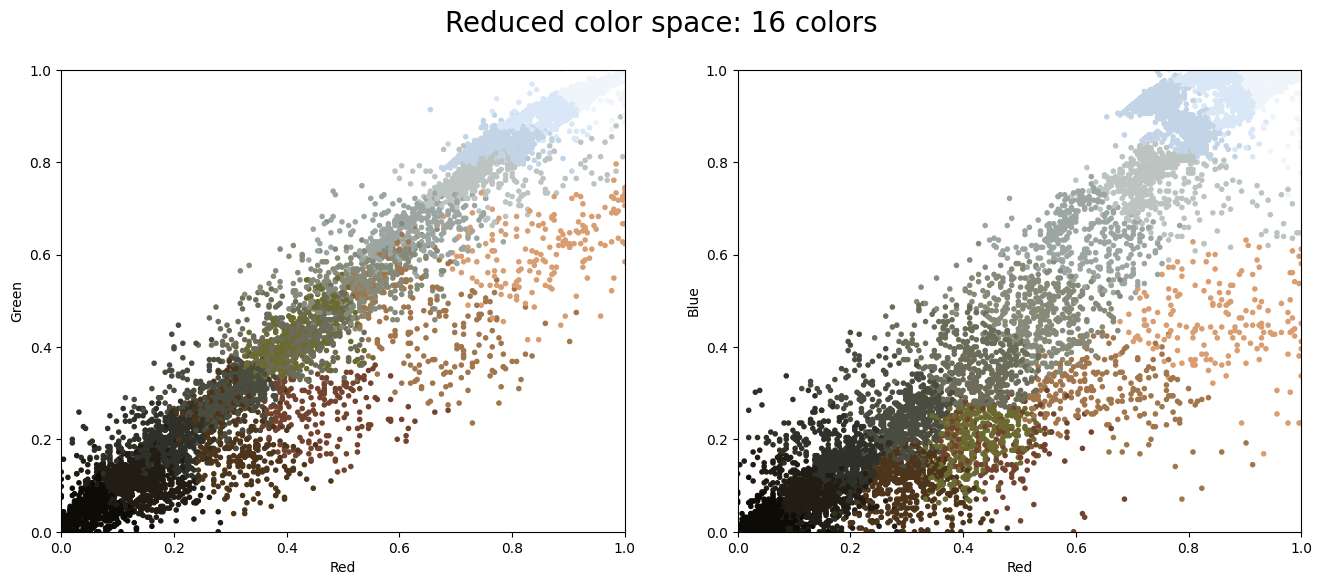

In [24]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")


O resultado é uma recoloração dos pixels originais, onde cada pixel é atribuído à cor do seu cluster mais próximo.  Plotando essas novas cores no espaço da imagem (em vez do espaço de pixels), vemos o efeito deste:


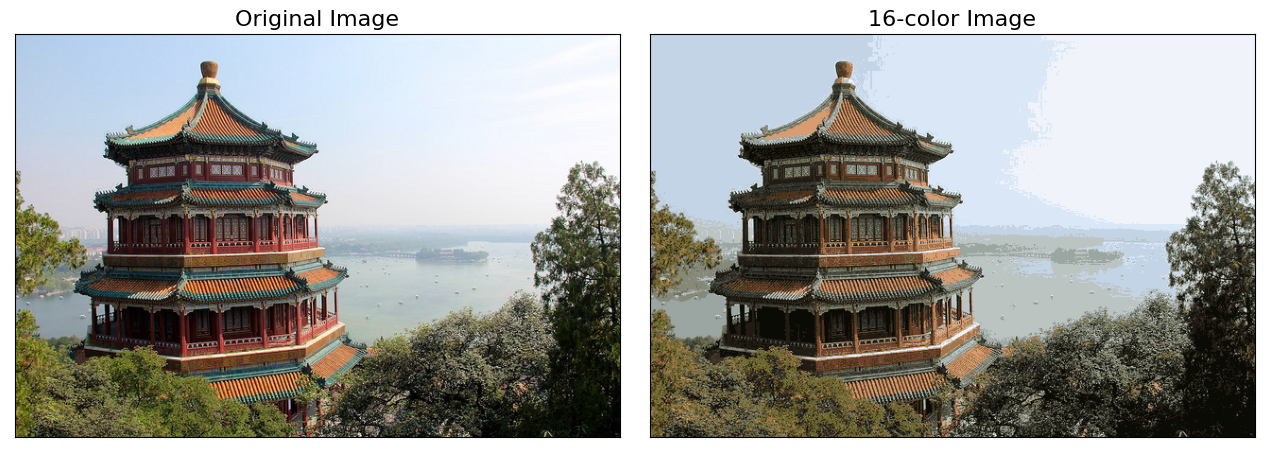

In [25]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);


A figura final mostra a comparação entre a imagem original e a versão recolorida com 16 cores.

Algum detalhe é certamente perdido no painel da direita, mas a imagem geral ainda é facilmente reconhecível. Esta imagem na direita alcança um fator de compressão de cerca de 1 milhão! Embora este seja uma aplicação interessante do *k*-means, existem certamente melhores maneiras de comprimir informações em imagens. Mas o exemplo demonstra o poder de pensar fora da caixa com métodos não supervisionados como *k*-means.
